In [1]:
from datasets import get_dataset

In [2]:
from configs.get_configs import get_config

In [3]:
class DotDict(dict):
    def __getattr__(self, key):
        return self[key]
    def __setattr__(self, key, val):
        if key in self.__dict__:
            self.__dict__[key] = val
        else:
            self[key] = val

In [4]:
args = DotDict()
args.conf = "sd_128"
args.test = False

In [5]:
config = get_config(args)

Read Config: 
data:
  category: mel
  centered: false
  channels: 1
  dataset: speech_commands
  image_height: 128
  image_width: 128
  mel_root: mel_datasets/sc09_128
  num_channels: 1
  spec:
    audio_length: 1
    hop_length: 128
    image_size: 128
    nfft: 512
    num_mels: 128
    sample_rate: 16000
    spec_len_samples: 128
  uniform_dequantization: false
device: !!python/object/apply:torch.device
- cpu
eval:
  batch_size: 32
  begin_ckpt: 30
  bpd_dataset: test
  enable_bpd: false
  enable_interpolate: false
  enable_loss: false
  enable_rescale: false
  enable_sampling: true
  end_ckpt: 31
  num_samples: 100
  save_images: true
model:
  attention_levels:
  - 2
  beta_max: 20.0
  beta_min: 0.1
  channel_multipliers:
  - 1
  - 2
  - 2
  - 2
  channels: 128
  conv_size: 3
  d_cond: 128
  dropout: 0.0
  ema_rate: 0.9999
  embedding_type: fourier
  n_heads: 1
  n_res_blocks: 2
  name: stablediff
  nf: 128
  num_scales: 2000
  scale_by_sigma: false
  sigma_end: 0.01
  sigma_max: 3

In [6]:
trainds, evalds, builder = get_dataset(config)

Initilaized MEL training dataset.
Initilaized MEL validation dataset.


/cluster/apps/nss/gcc-8.2.0/python/3.10.4/x86_64/lib64/python3.10/site-packages/torch/utils/data/dataloader.py:487: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [30]:
import torchvision
cf10 = torchvision.datasets.CIFAR10(root='.', download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .


In [20]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

In [63]:
norms_2 = []
norms = []
for item in tqdm(cf10):
    pic = np.array(item[0]) / 255.0
    norm_2 = np.sqrt(pic.ravel()**2)
    norms_2.append(norm_2)
    norm = pic.ravel()**2
    norms.append(norm)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [00:05<00:00, 9738.04it/s]


In [64]:
norms = np.array(norms)
norms.mean()

0.2873594542857112

In [73]:
norms_2 = []
norms = []
for batch in tqdm(trainds):
    for item in batch:
        norm = item.numpy().ravel()**2
        norms.append(norm)
        norm_2 = np.sqrt(item.numpy().ravel()**2)
        norms_2.append(norm_2)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15579/15579 [00:58<00:00, 267.65it/s]


In [74]:
norms = np.array(norms)
norms.mean()

0.4513048

In [75]:
32 * (0.451/0.2874)

50.21572720946416

In [16]:
counter*config.training.batch_size

31104

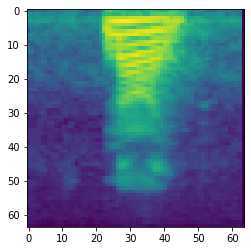

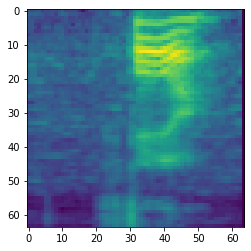

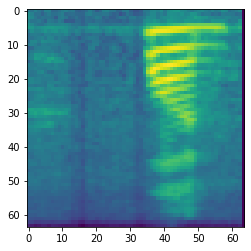

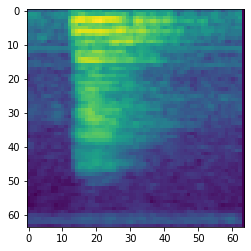

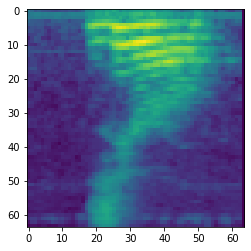

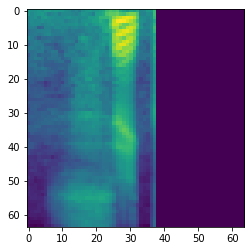

In [12]:
for i, item in enumerate(trainds):
    if i>5: break
    plt.figure()
    plt.imshow(item[0][0])
    plt.show()